In [ ]:
# ... (Previous code)

# Testing

test_set = pd.read_csv(r"BTC-INRtest.csv", index_col="Date")
test_set.dropna(inplace=True)

whole_dataset = pd.concat((train_set, test_set), 0)
whole_dataset1 = pd.concat((train_set, test_set), 0)
whole_dataset = whole_dataset.iloc[:, 0:1].values

previous30days = []
for i in range(len(whole_dataset)-len(test_set), len(whole_dataset)):
    previous30days.append(whole_dataset[i-DAYS:i, 0])
previous30days = np.array(previous30days)

scaled_test_data = sc.transform(previous30days.reshape(-1, 1))
scaled_test_data = scaled_test_data.reshape(-1, DAYS)
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)

y_pred = sc.inverse_transform(rnn.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)

predicted_data = pd.DataFrame({"Predicted": y_pred}, index=test_set.index)
plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
plotdata = plotdata.iloc[500:, :]

# Calculate test percentage accuracy
actual_values = test_set["Open"].values
test_percentage_accuracy = np.mean(np.abs((actual_values - y_pred) / actual_values)) * 100
print(f"Test Percentage Accuracy: {test_percentage_accuracy:.2f}%")

# ... (Plotting code)


Epoch 1/100
112/112 [==============================] - 45s 202ms/step - loss: 0.0145
Epoch 2/100
112/112 [==============================] - 22s 195ms/step - loss: 0.0086
Epoch 3/100
112/112 [==============================] - 23s 202ms/step - loss: 0.0078
Epoch 4/100
112/112 [==============================] - 23s 202ms/step - loss: 0.0075
Epoch 5/100
112/112 [==============================] - 24s 216ms/step - loss: 0.0063
Epoch 6/100
112/112 [==============================] - 21s 191ms/step - loss: 0.0066
Epoch 7/100
112/112 [==============================] - 23s 202ms/step - loss: 0.0078
Epoch 8/100
112/112 [==============================] - 22s 200ms/step - loss: 0.0070
Epoch 9/100
112/112 [==============================] - 22s 197ms/step - loss: 0.0063
Epoch 10/100
112/112 [==============================] - 22s 194ms/step - loss: 0.0058
Epoch 11/100
112/112 [==============================] - 22s 200ms/step - loss: 0.0069
Epoch 12/100
112/112 [==============================] - 22s 200

<ipython-input-1-eab9407b5e73>:67: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  whole_dataset = pd.concat((train_set, test_set), 0)
<ipython-input-1-eab9407b5e73>:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  whole_dataset1 = pd.concat((train_set, test_set), 0)


2/2 [==============================] - 3s 48ms/step


<ipython-input-1-eab9407b5e73>:84: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
<ipython-input-1-eab9407b5e73>:91: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


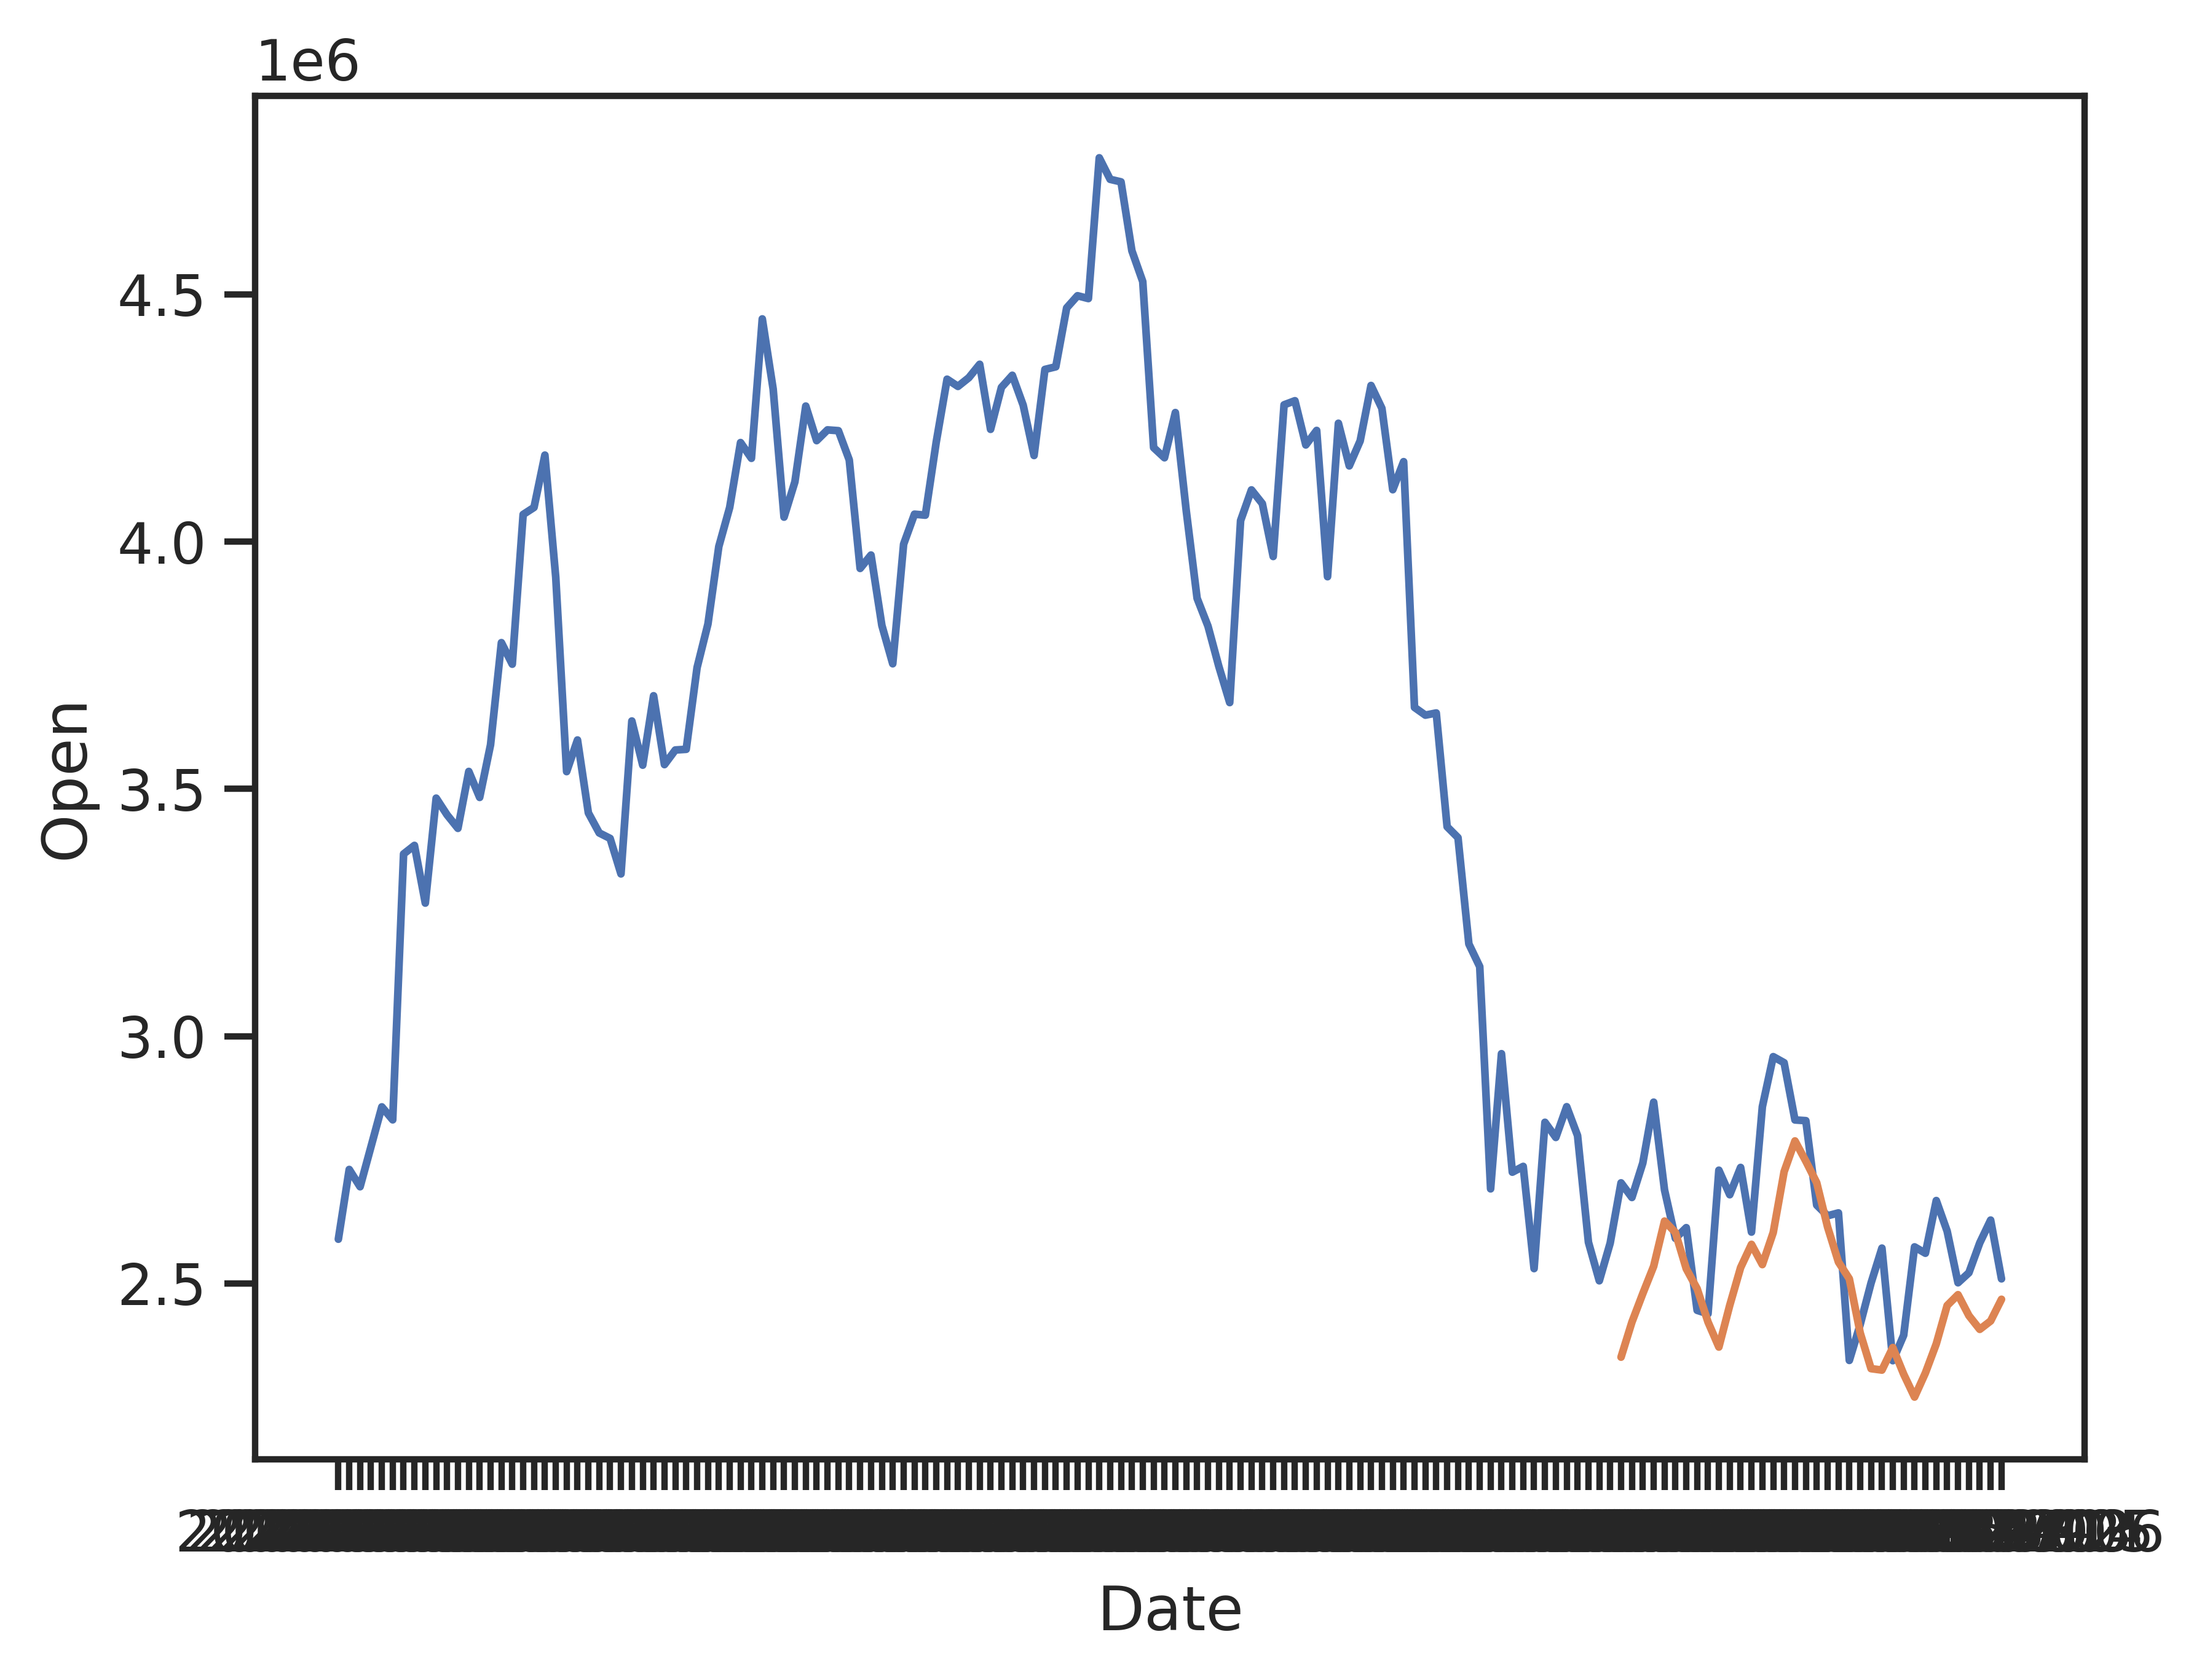

In [ ]:

# Imports

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Constants

DAYS = 60
BATCH_SIZE = 5
EPOCHS = 100

# Training

training_set = pd.read_csv(r"BTC-INR.csv", index_col="Date")
training_set.dropna(inplace=True)

training_set = training_set.iloc[:, 0:1].values ## contains only open values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))
training_set_sc = sc.fit_transform(training_set)

# Split

X_train = []
y_train = []
for i in range(DAYS, len(training_set_sc)):
    X_train.append(training_set_sc[i-DAYS:i, 0])
    y_train.append(training_set_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Learning

rnn = tf.keras.models.Sequential()

rnn.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(DAYS, 1)))

rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))
rnn.add(tf.keras.layers.LSTM(75))
rnn.add(tf.keras.layers.Dropout(0.2))

rnn.add(tf.keras.layers.Dense(1))

rnn.compile(optimizer="adam", loss="mean_squared_error")

X_train = X_train.reshape(len(X_train), DAYS, 1)
rnn.fit(X_train, y_train, batch_size=BATCH_SIZE , epochs=EPOCHS)


train_set = pd.read_csv(r"BTC-INR.csv", index_col="Date")
train_set.dropna(inplace=True)

test_set = pd.read_csv(r"BTC-INRtest.csv", index_col="Date")
test_set.dropna(inplace=True)

whole_dataset = pd.concat((train_set, test_set), 0)
whole_dataset1 = pd.concat((train_set, test_set), 0)
whole_dataset = whole_dataset.iloc[:, 0:1].values

previous30days = []
for i in range(len(whole_dataset)-len(test_set), len(whole_dataset)):
    previous30days.append(whole_dataset[i-DAYS:i, 0])
previous30days = np.array(previous30days)

scaled_test_data = sc.transform(previous30days.reshape(-1, 1))
scaled_test_data = scaled_test_data.reshape(-1, DAYS)
scaled_test_data = scaled_test_data.reshape(scaled_test_data.shape[0], DAYS, 1)

y_pred = sc.inverse_transform(rnn.predict(scaled_test_data))
y_pred = y_pred.reshape(-1,)

predicted_data = pd.DataFrame({"Predicted": y_pred}, index=test_set.index)
plotdata = pd.concat((whole_dataset1["Open"], predicted_data), 1)
plotdata = plotdata.iloc[500:, :]

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

sns.lineplot(data=plotdata["Open"])
sns.lineplot(data=plotdata["Predicted"])
plt.show()